In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.options.display.max_columns = 40
data = pd.read_csv('http://cluster.earlham.edu/~apc0013/Chicago_crime.csv')
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2746413,HJ384532,05/20/2003 08:00:00 PM,072XX S FAIRFIELD AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,831,8.0,18.0,66.0,05,1159293.0,1856544.0,2003,02/28/2018 03:56:25 PM,41.762076,-87.691736,"(41.762075613, -87.691735556)"
1,2746414,HJ385055,05/24/2003 09:25:00 PM,015XX W ROOSEVELT RD,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,1231,12.0,2.0,28.0,04B,1166352.0,1894784.0,2003,02/28/2018 03:56:25 PM,41.866863,-87.664773,"(41.866863003, -87.664772948)"
2,2746415,HJ384304,05/24/2003 01:10:00 PM,062XX S CLAREMONT AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,False,825,8.0,15.0,66.0,03,1161795.0,1863307.0,2003,02/28/2018 03:56:25 PM,41.780583,-87.682378,"(41.78058266, -87.682377751)"
3,2746416,HJ384255,05/24/2003 02:00:00 PM,031XX N CLARK ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,1932,19.0,44.0,6.0,06,1170274.0,1920971.0,2003,02/28/2018 03:56:25 PM,41.938637,-87.649609,"(41.938636968, -87.64960867)"
4,2746418,HJ385442,05/25/2003 02:22:00 AM,031XX N BROADWAY,0810,THEFT,OVER $500,STREET,False,False,2332,19.0,44.0,6.0,06,1171708.0,1920869.0,2003,02/28/2018 03:56:25 PM,41.938326,-87.644341,"(41.938325571, -87.644341433)"


In [3]:
data['Date'] = pd.to_datetime(data.Date, format="%m/%d/%Y %I:%M:%S %p")

In [4]:
data['month'] = data['Date'].dt.month
data['time'] = data['Date'].dt.hour
data['time'].head()

0    20
1    21
2    13
3    14
4     2
Name: time, dtype: int64

Text(0,0.5,'Frequency')

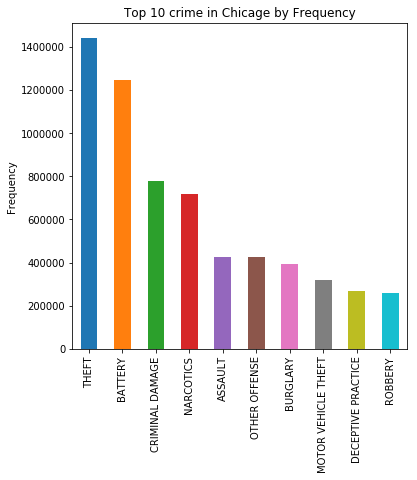

In [5]:
fig = plt.figure(figsize= (6,6))
ax = fig.gca()
topTen = data['Primary Type'].value_counts().head(10)
topTen.plot(kind = 'bar', ax=ax)
ax.set_title('Top 10 crime in Chicage by Frequency')
ax.set_ylabel('Frequency')

In [6]:
x = data.groupby('Year')['Primary Type'].value_counts().to_frame()
x.rename(columns= {'Primary Type': 'Count'}, inplace=True)
x.reset_index(inplace=True)
x.head()

,Year,Primary Type,Count
0,2001,THEFT,99264
1,2001,BATTERY,93446
2,2001,CRIMINAL DAMAGE,55851
3,2001,NARCOTICS,50567
4,2001,ASSAULT,31384


/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


Text(0,0.5,'Frequency')

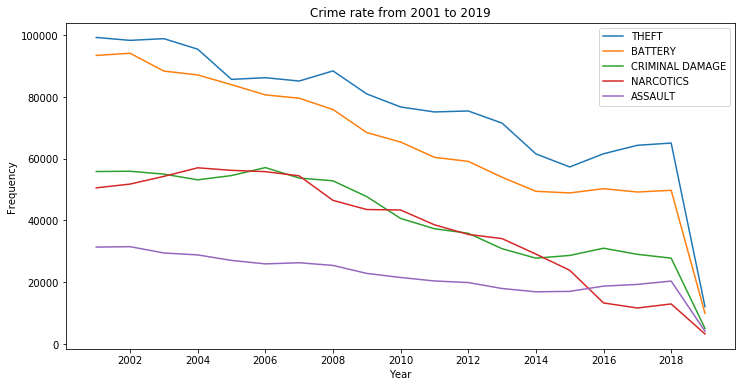

In [7]:
fig = plt.figure(figsize= (12,6))
ax = fig.gca()
theft = x[x['Primary Type']=='THEFT']
theft.rename(columns={'Count': 'THEFT'}, inplace= True)
battery = x[x['Primary Type']=='BATTERY']
battery.rename(columns={'Count': 'BATTERY'}, inplace= True)
crim = x[x['Primary Type']=='CRIMINAL DAMAGE']
crim.rename(columns={'Count': 'CRIMINAL DAMAGE'}, inplace= True)
narc = x[x['Primary Type']=='NARCOTICS']
narc.rename(columns={'Count': 'NARCOTICS'}, inplace= True)
assault = x[x['Primary Type']=='ASSAULT']
assault.rename(columns={'Count': 'ASSAULT'}, inplace= True)
theft.plot(kind = 'line', x = 'Year', y = 'THEFT', ax=ax,xticks=[2000,2002,2004,2006,2008,2010,2012,2014,2016, 2018,2020])
battery.plot(kind = 'line', x = 'Year', y = 'BATTERY', ax=ax)
crim.plot(kind = 'line', x = 'Year', y = 'CRIMINAL DAMAGE', ax=ax)
narc.plot(kind = 'line', x = 'Year', y = 'NARCOTICS', ax=ax)
assault.plot(kind = 'line', x = 'Year', y = 'ASSAULT', ax=ax)
ax.set_title('Crime rate from 2001 to 2019')
ax.set_ylabel('Frequency')

In [9]:
# we see about 40% arrest rate overall
old = data[data['Year']<2018]
old['Arrest'].value_counts()

False    4691142
True     1826871
Name: Arrest, dtype: int64

In [12]:
# after 2018, arrest rate has fallen to below 25%
recent = data[data['Year']>2017]
recent['Arrest'].value_counts()

False    254149
True      63861
Name: Arrest, dtype: int64

In [13]:
month = data.groupby('month')['month'].value_counts().to_frame()
month.rename(columns={'month':'Count'},inplace=True)
month.reset_index(level=0, inplace=True)
month.reset_index(drop=True)
month.head()

,month,Count
month,,
1,1,547596
2,2,481763
3,3,572515
4,4,559129
5,5,603145


Text(0.5,1,'Criminal Activity by Month')

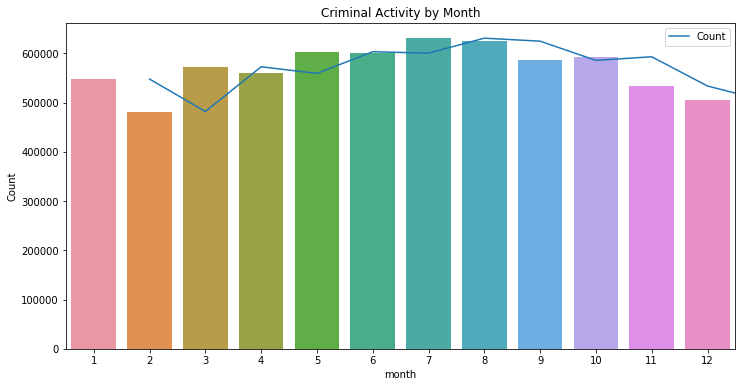

In [14]:
fig = plt.figure(figsize= (12,6))
ax = fig.gca()
sns.barplot(data = month, x = 'month', y = 'Count',ax=ax)
month.plot(kind='line', x = 'month', y = 'Count',ax=ax)
ax.set_title('Criminal Activity by Month')

In [15]:
time = data.groupby('time')['time'].value_counts().to_frame()
time.rename(columns={'time':'Count'},inplace=True)
time.reset_index(level=0, inplace=True)
time.reset_index(drop=True)
time['time'] = time.replace(to_replace= 0 , value= 24)
time.head()

,time,Count
time,,
0,24,377930
1,1,216571
2,2,181731
3,3,146428
4,4,110274


Text(0.5,1,'Criminal Activity by the hour')

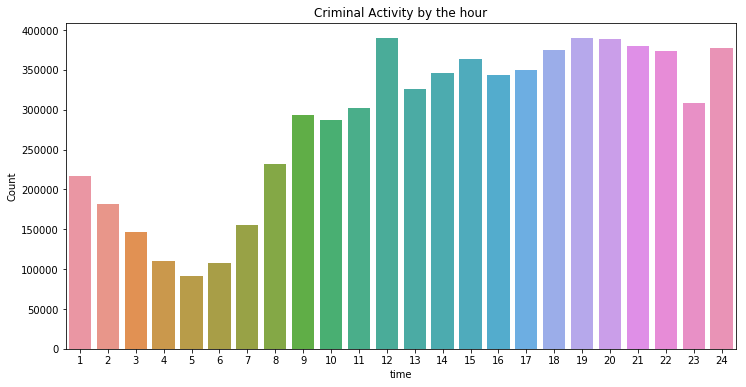

In [16]:
fig = plt.figure(figsize= (12,6))
ax = fig.gca()
# time.plot(kind='line', x = 'time', y = 'Count',ax=ax)
sns.barplot(data = time, x = 'time', y = 'Count',ax=ax)
# sns.lineplot(data = time, x = 'time', y = 'Count',ax=ax)
ax.set_title('Criminal Activity by the hour')

In [24]:
timeloc = data.groupby(['time'])['Location Description'].value_counts().to_frame()
timeloc.rename(columns = {'Location Description': 'Count'}, inplace = True)
timeloc.reset_index(inplace = True)
timeloc.drop_duplicates(subset='time', inplace=True )

In [26]:
timeloc

,time,Location Description,Count
0,0,STREET,113259
128,1,STREET,69150
256,2,STREET,56921
388,3,STREET,44636
517,4,STREET,32784
641,5,STREET,26190
767,6,STREET,30020
889,7,STREET,40605
1008,8,STREET,51340
1137,9,RESIDENCE,74095


In [39]:
thefttt = data[data['Primary Type']=='THEFT']
thefttt['Location Description'].value_counts().head()

STREET                            393297
RESIDENCE                         150489
OTHER                              82079
PARKING LOT/GARAGE(NON.RESID.)     72662
DEPARTMENT STORE                   70542
Name: Location Description, dtype: int64